In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


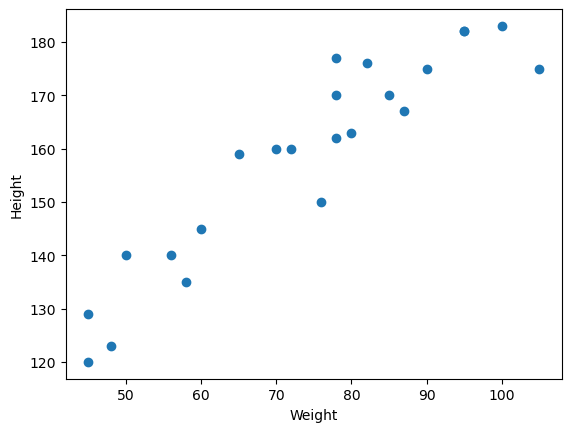

In [7]:
#scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [8]:
df.corr() # correlation

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [9]:
import seaborn as sns

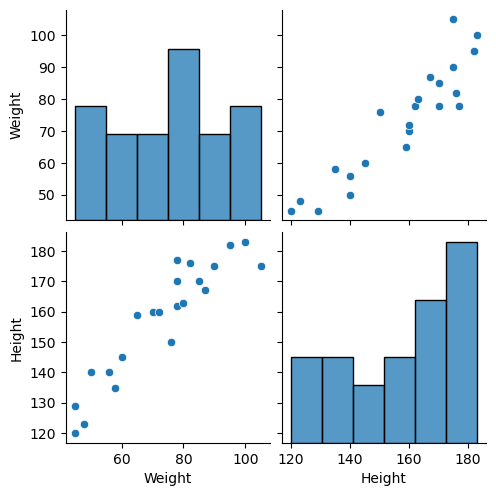

In [53]:
sns.pairplot(df)
plt.show()

In [14]:
# independent and dependent features
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [18]:
X = df['Weight']
print(type(X))
print(type(df[['Weight']]))
df[['Weight']].head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,Weight
0,45
1,58
2,48
3,60
4,70


In [19]:
np.array(X)

array([ 45,  58,  48,  60,  70,  78,  80,  90,  95,  78,  82,  95, 105,
       100,  85,  78,  50,  65,  76,  87,  45,  56,  72], dtype=int64)

In [20]:
np.array(X).shape

(23,)

In [21]:
X1 = df[['Weight']]

In [22]:
np.array(X1).shape

(23, 1)

In [23]:
y=df['Height'] #dependent variable may be in series no need for dataframe
#this variable can be in series form or 1D array
np.array(y).shape

(23,)

In [31]:
X = X1 # for practice purpose, I have created X1 variable but it is acually X we use X1 as X in further code.

In [32]:
## Train test split
from sklearn.model_selection import train_test_split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
X_train.shape

(17, 1)

In [36]:
from sklearn.linear_model import LinearRegression

In [40]:
regression=LinearRegression(n_jobs=-1)

In [41]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [42]:
regression.coef_

array([1.04792503])

In [43]:
regression.intercept_

80.52684512622542

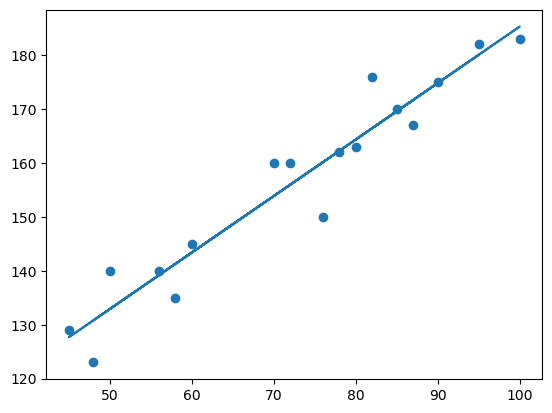

In [46]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

In [47]:
#prediction for test data
y_pred = regression.predict(X_test)

In [48]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mse = mean_squared_error(y_test, y_pred)
mae =mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228686
9.665125886795005
10.7163749912126


In [50]:
#R-Square
from sklearn.metrics import r2_score

In [51]:
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981279


# Adjusted R-square = 1-[(1-R2)*(n-1)/(n-k-1)]
# Where
# R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [52]:
# display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476599

In [55]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 699.0 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/9.8 MB 699.0 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/9.8 MB 645.7 kB/s eta 0:00:14
   ---- ----------------------------------- 1.0/9.8 MB 653.7 kB/s eta 0:00:14
   ---- ----------------------------------- 1.0/9.8 MB 653.7 kB/s eta 0:00:14
   ----- ---------------------------------- 1.3/9.8 MB 692.1 kB/s eta 0:00:13
   ------ --------------------------------- 1.6/9.8 MB 711.2 kB/s eta 0:00:12
   ------ --------------------------------- 1.6/9.8 MB 711.2 kB/s eta 0:00:12
   ------- --------------------

In [57]:
import statsmodels.api as sm

In [58]:
model = sm.OLS(y_train, X_train).fit()

In [59]:
prediction = model.predict(X_test)
print(prediction)

15    164.134205
9     164.134205
0      94.692811
8     199.907045
17    136.778504
12    220.949891
dtype: float64


In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):                    2.80e-16
Time:                        18:43:11   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data

StandardScaler()

In [63]:
regression.predict(scaler.transform([[72]]))

d:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.49697064])